# ATS Project 
# An Engine to switch between Momentum and Mean-reverting strategy

Lecturer: Robert Wojciechowski

Student: Quynh Bui (393519)

# I. Prepare functions

First, we should load some necessary library

In [1]:
from numpy import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## 1. Mean

In [2]:
# MEAN
def Mean(inputA):
    mysum = 0
    for i in range(len(inputA)):
        mysum = mysum + inputA[i]
    
    return mysum/len(inputA)

## 2. Standard deviation

In [3]:
# STANDARD DEVIATION
def Std(inputA):
    mymean = Mean(inputA)
    mysum = 0
    for i in range(len(inputA)):
        mysum = mysum + (inputA[i] - mymean)**2
        
    return (mysum/(len(inputA)-1))**0.5

## 3. Sharpe Ratio

In [4]:
# SHARPE RATIO

def SR(listA, r_f = 0.00001, scale = (252**0.5)):
    return (Mean(listA) - r_f)/Std(listA) * scale

## 4. Information Ratio

In [5]:
# INFORMATION RATIO

def IR(listA, listB, scale = 252**0.5):
    
    if len(listA) != len(listB):
        print('2 series should have the same length')
        return
    
    myreturn = [listA[i] - listB[i] for i in range(len(listA))]
    return_ = Mean(myreturn)
    std_ = Std(myreturn)
    
    return return_/std_ * scale

list1 = [1, 3, 4, 6, 8] 
list2 = [4, 5, 6, 2, 10]
IR(list1, list2)
#IR(return_total_train, SP500_return_train)

-5.612486080160912

## 5. Maximum Drawdown 

In [6]:
# MAXIMUM DRAWDOWN

def MaxDD(valueList):
    
    dList = list()
    
    for i in range(1, len(valueList)):
        myMax = max(valueList[0:i])
        if myMax != 0:
            D_t = (valueList[i] - myMax)/myMax
        else:
            D_t = 0
        dList.append(D_t)
    
    return min(dList)

values = [0,0,0,2,4,2,4,3,3,3]
MaxDD(values)

-0.5

## 6. Exponential Moving Average

In [7]:
# EXPONENTIAL MOVING AVERAGE
def EMA(listA, window_size):
    
    # create a NaN list having the same size as input
    result = [np.nan for i in range(len(listA))]
    multiplier = 2/(window_size + 1)
    
    for i in range(len(listA) - window_size + 1):
        
        window_last_index = i + window_size-1
        
        # The result of each window calculation is put at the last index of the window
        if i == 0:
            result[window_last_index] = Mean(listA[i:window_last_index+1])
        
        else:
            previous_EMA = result[window_last_index - 1]
            result[window_last_index] = (
                listA[window_last_index] - previous_EMA)*multiplier + previous_EMA
    
    return result

listA = np.asarray([i for i in range(50, 61)] + [j for j in range(7, 41, 3)])
print(listA)

# We will have the result with the same size as input list, 
# with some initial values = nan (depend on window size)
print(EMA(listA, 4))
print(np.isnan(EMA(listA, 4)[0]))

myEMA = np.asarray(EMA(listA, 4))
myEMA = myEMA[~np.isnan(myEMA)]
print(myEMA)

[50 51 52 53 54 55 56 57 58 59 60  7 10 13 16 19 22 25 28 31 34 37 40]
[nan, nan, nan, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 37.9, 26.74, 21.244, 19.1464, 19.08784, 20.252704, 22.1516224, 24.49097344, 27.094584064000003, 29.856750438400002, 32.71405026304, 35.628430157824]
True
[51.5        52.5        53.5        54.5        55.5        56.5
 57.5        58.5        37.9        26.74       21.244      19.1464
 19.08784    20.252704   22.1516224  24.49097344 27.09458406 29.85675044
 32.71405026 35.62843016]


## 7. Rolling standard deviation 

In [8]:
# ROLLING STANDARD DEVIATION
def roll_sd(listA, window_size):
    
    # create a NaN list having the same size as input
    result = [np.nan for i in range(len(listA))]
    
    for i in range(len(listA) - window_size + 1):
        window_last_index = i + window_size-1
        
        # The result of each window calculation is put at the last index of the window
        result[window_last_index] = Std(listA[i:window_last_index+1])
    
    return result

listA = np.random.normal(size = (2,20))
print(listA[0])

# We will have the result with the same size as input list, 
# with some initial values = nan (depend on window size)
print(roll_sd(listA[0], 4))

[-0.16582598  0.52622412  1.08422253  0.02356088 -2.26256206 -0.84419318
  0.02921429 -0.22671964  0.29334535 -0.05822099 -0.37689815  1.12301771
 -1.0243123   1.10697325  0.33610349  0.23311965  1.73503101  0.93651305
  0.04973888 -0.32563996]
[nan, nan, nan, 0.560242332397232, 1.4689477284713812, 1.4152703734868572, 1.0803640152048175, 1.025438109417499, 0.4868130279078135, 0.21705809679552238, 0.28806731674676334, 0.6460010990019674, 0.8995429963282359, 1.0810653941998931, 1.0090369560271475, 0.88236001037351, 0.7056709863206388, 0.6901827353425176, 0.7663951037225438, 0.9239639834195252]


## 8. Cumulative simple return

In [9]:
def cum_ret(listA):
    
    res = []
    sum_prod = 1
    for i in range(len(listA)):
        sum_prod = sum_prod * (1+listA[i])
        res.append(sum_prod)
    
    return res

myreturn = [0, 0.3, 0.15, -0.2, 0.25, -0.27]
cum_ret(myreturn)
    

[1, 1.3, 1.4949999999999999, 1.196, 1.4949999999999999, 1.0913499999999998]

## 9. Breakout Volatility model 

In [10]:
# BREAKOUT VOLATILITY MODEL

def breakout_vol(signal, lower, upper, strategy = "mr"): # strategy should be "mom" for momentum or "mr" for mean-reverting
    
    if strategy not in ("mom", "mr"):
        print("Please use 'mom' or 'mr' for strategy!")
        return
    
    # we create an array position filled with 0 and has the same length as signal
    position = zeros(len(signal), dtype = int8)
    
    for i in range(1, len(signal)):
         
        if (np.isnan(signal[i-1]) == False) and (np.isnan(lower[i-1]) == False) and (np.isnan(upper[i-1]) == False) :
            
            # Here we generate signal for mean-reverting strategy
            # what if the previous position is 0
            if position[i-1] == 0:
                if signal[i-1] > upper[i-1]:
                    position[i] = -1 # switch to short position as long as signal > upper threshold
                if signal[i-1] < lower[i-1]:
                    position[i] = 1 # switch to long position as long as signal > lower threshold
            
            # what if the previous position is -1
            elif position[i-1] == -1:
                if signal[i-1] > lower[i-1]:  
                    position[i] = -1 # keep short position as long as signal > lower threshold
                if signal[i-1] < lower[i-1]:
                    position[i] = 1 # switch to long position as long as signal < lower threshold
                
            # what if the previous position is 1
            elif position[i-1] == 1:
                if signal[i-1] < upper[i-1]:  
                    position[i] = 1 # keep long position as long as signal < upper threshold
                if signal[i-1] > upper[i-1]:
                    position[i] = -1 # switch to short position as long as signal > upper threshold 
            
        # if signal or lower or upper has Nan value
        else:
            position[i] = position[i-1]
    
    # reverse the position if the strategy is momentum
    if strategy == "mom":
        position = [-position[i] for i in range(len(position))]
    
    return position
    
signal = np.random.normal(size = (20))
lower = np.random.normal(size = (20))
upper = np.random.normal(size = (20))

print(breakout_vol(signal = signal, lower = lower, upper = upper, strategy = 'mom'))

[0, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1]


## 10. Hurst Exponent 

The function to calculate Hurst exponent is sourced from external file 'genhurst.py'.

The source of this function is: https://github.com/PTRRupprecht/GenHurst

In [1]:
from genhurst import *

signal = np.random.normal(size = (1000))
# print(type(signal))
genhurst (signal, maxT = 250)

C:\Users\wazza\Google Drive\CucCungHu\code\Python\ATS2019_Project_Code_QUYNH_BUI_393519\genhurst.py:65: RuntimeWarning: divide by zero encountered in log10
  my = np.mean(np.log10(mcord))
C:\Users\wazza\Google Drive\CucCungHu\code\Python\ATS2019_Project_Code_QUYNH_BUI_393519\genhurst.py:66: RuntimeWarning: divide by zero encountered in log10
  SSxy = np.sum(np.multiply(np.log10(x), np.transpose(np.log10(mcord)))) - Tmax*mx*my
C:\Users\wazza\Google Drive\CucCungHu\code\Python\ATS2019_Project_Code_QUYNH_BUI_393519\genhurst.py:66: RuntimeWarning: invalid value encountered in double_scalars
  SSxy = np.sum(np.multiply(np.log10(x), np.transpose(np.log10(mcord)))) - Tmax*mx*my


0.044994945963679825

# II. Data 

In [14]:
#Load data
SP500 = pd.read_csv('SP500.csv')
SP500 = SP500.drop(['Open', 'High','Low', 'Close','Volume'], axis=1)
SP500 = SP500.rename(columns = {'Adj Close':'Adj_Close'})
SP500['Close_prev'] = SP500['Adj_Close'].shift(1)
SP500['Diff'] = SP500['Adj_Close'] - SP500['Close_prev']
SP500['Simple_Return'] = (SP500['Diff']/SP500['Close_prev'])
print(SP500.head())
print(SP500.count()) # we have 2898 obsevations here

print(SP500.Adj_Close.iloc[0:5])
print(SP500.Adj_Close.values[0:5])
SP500.iloc[2141: 2144, 0:2]

        Date    Adj_Close   Close_prev       Diff  Simple_Return
0  6/27/2007  1506.339966          NaN        NaN            NaN
1  6/28/2007  1505.709961  1506.339966  -0.630005      -0.000418
2  6/29/2007  1503.349976  1505.709961  -2.359985      -0.001567
3   7/2/2007  1519.430054  1503.349976  16.080078       0.010696
4   7/3/2007  1524.869995  1519.430054   5.439941       0.003580
Date             2898
Adj_Close        2898
Close_prev       2897
Diff             2897
Simple_Return    2897
dtype: int64
0    1506.339966
1    1505.709961
2    1503.349976
3    1519.430054
4    1524.869995
Name: Adj_Close, dtype: float64
[1506.339966 1505.709961 1503.349976 1519.430054 1524.869995]


,Date,Adj_Close
2141,12/28/2015,2056.500000
2142,12/29/2015,2078.360107
2143,12/30/2015,2063.360107


# III. Building trading strategy 

## 1. Divide data set

In [15]:
# We divide data set into training data and test data

SP500_train = SP500.iloc[0:2142, :] 
# here the first 126 observations (last 6 months of 2007) are used only for 
# Hurst exponent calculation (to determine strategy), EMA and rolling std calculation 
# at the beginning of 2008. We start trading at the beginning of 2008.
SP500_train.reset_index(drop = True, inplace = True) # reset index to start counting at 0
print(SP500_train.head(10))
print(SP500_train.count()) # training set has 2142 observations, 
                           # which is about 73% whole sample

# Similarly to training data, the first 126 observations of testing data (first 6 months of 2016) 
# are used only for Hurst exponent, EMA and rolling std calculation at the beginning of 2016. 
# We start trading from June of 2016
SP500_test = SP500.iloc[2142:, :]
SP500_test.reset_index(drop = True, inplace = True) # reset index to start counting at 0
print(SP500_test.head(10))
print(SP500_test.count()) # testing set has 756 (882 - 126) observations, 
                          # which is about 26% whole sample

# theprice =  SP500_train.Adj_Close.values[0:10].copy()
# print(theprice)
# theprice[0] = 0
# print(theprice)
# print(SP500_train.head(10))

        Date    Adj_Close   Close_prev       Diff  Simple_Return
0  6/27/2007  1506.339966          NaN        NaN            NaN
1  6/28/2007  1505.709961  1506.339966  -0.630005      -0.000418
2  6/29/2007  1503.349976  1505.709961  -2.359985      -0.001567
3   7/2/2007  1519.430054  1503.349976  16.080078       0.010696
4   7/3/2007  1524.869995  1519.430054   5.439941       0.003580
5   7/5/2007  1525.400024  1524.869995   0.530029       0.000348
6   7/6/2007  1530.439941  1525.400024   5.039917       0.003304
7   7/9/2007  1531.849976  1530.439941   1.410035       0.000921
8  7/10/2007  1510.119995  1531.849976 -21.729981      -0.014185
9  7/11/2007  1518.760010  1510.119995   8.640015       0.005721
Date             2142
Adj_Close        2142
Close_prev       2141
Diff             2141
Simple_Return    2141
dtype: int64
         Date    Adj_Close   Close_prev       Diff  Simple_Return
0  12/29/2015  2078.360107  2056.500000  21.860107       0.010630
1  12/30/2015  2063.360107  20

## 2. Training data 

First, we calculate the Hurst exponent in advanced for the training data. The calculation is conducted at the beginning of each 6 months starting from beginning of 2008 and based on the historical data of the past 6 months. The q variable in genhurst function is fixed to be 1 and maxT is normally equal to 1/4 of length of time series. Here, we assume that every 6 months has 126 observations, so maxT is set to be 30.

In [16]:
# myseries = SP500.Adj_Close.values[126:252]
# print(genhurst(myseries, q = 1, maxT = 30))
# print(len(myseries))

Hurst_exponent_train = np.zeros(16)

for i in range(16): # in total, we will switch strategy 16 times for training set, 
                    # so we need to calculate Hurst exponent 16 times
    myseries = SP500_train.Adj_Close.values[(i*126):(i*126 + 126)]
    Hurst_exponent_train[i] = genhurst(myseries, 1, 30)
    
print(Hurst_exponent_train)

[0.47541963 0.38473048 0.40982695 0.4625857  0.42230285 0.59721149
 0.41206793 0.45774405 0.42793779 0.48444737 0.41518921 0.36142105
 0.52885604 0.40103538 0.55825307 0.33595092]


In [17]:
# Training data

for signal_size in (10, 15, 20, 30, 45):
    for EMA_size in (10, 20, 30, 45, 60, 90):
        for vol_size in (10, 20, 30, 45, 60, 90, 120):
            for m in (0.3, 0.5, 0.7, 1, 1.5, 2):

                for i in range(1, 17): # we have 2142 observations, so we will switch strategy 16 times (2142/126 - 1 = 16)
                                       # and we start trading at the beginning of 2008, so i should start from 1, not 0

                    myPrice = SP500_train.Adj_Close.values[(i*126):(i*126 + 126)].copy()
                    
                    # Here, we smooth the time series of price by fast EMA (from 10 to 45) and use it as a signal
                    # in the volatility breakout model instead of the price series itself
                    mySignal = np.asarray(EMA(SP500_train.Adj_Close.values[(i*126 - signal_size+1):(i*126 + 126)].copy(), 
                                              signal_size))
                    mySignal = mySignal[~np.isnan(mySignal)]
                    
                    # Now, we calculate the Upper and Lower thresholds for the breakout model
                    myEMA = np.asarray(EMA(SP500_train.Adj_Close.values[(i*126 - EMA_size+1):(i*126 + 126)].copy(), EMA_size))
                    myEMA = myEMA[~np.isnan(myEMA)]
                    
                    myVol = np.asarray(roll_sd(SP500_train.Adj_Close.values[(i*126 - vol_size+1):(i*126 + 126)].copy(), 
                                               vol_size))
                    myVol = myVol[~np.isnan(myVol)]
                    
                    myLower = myEMA - m * myVol
                    myUpper = myEMA + m * myVol
                    
                    # Based on Hurst exponent, we determine the strategy for the period (momentum or mean-reverting)
                    hurst = Hurst_exponent_train[i-1]

                    if hurst < 0.5:
                        pos = np.asarray(breakout_vol (signal = mySignal, 
                                                       lower = myLower,
                                                       upper = myUpper,
                                                       strategy = "mr")) # if hurst < 0.5, we apply mean-reverting strategy
                    elif hurst > 0.5:
                        pos = np.asarray(breakout_vol (signal = mySignal, 
                                                       lower = myLower,
                                                       upper = myUpper,
                                                       strategy = "mom")) # if hurst > 0.5, we apply momentum strategy
                    else:
                        pos = np.ones(len(myPrice)) # else we just apply buy & hold for that period

                    # We calculate number of transactions by taking 1st difference of position
                    ntrans = np.asarray([abs(pos[i] - pos[i-1]) for i in range(1, len(pos))])
                    # To have the same length as pos array, we add 1 more element at the beginning of ntrans array
                    # the position at the beginning is just 0
                    ntrans = np.insert(ntrans, 0, 0)

                    # The transaction cost is assumed to be 0.01%, we trade on 100 units, so we calculate the daily
                    # gain/loss as Difference_in_price * position * 100 - no_of_trans * 0.0001 * price * 100
                    myDiff = SP500_train.Diff.values[(i*126):(i*126 + 126)].copy()
                    PnL = myDiff * 100 * pos  - ntrans * 0.0001 * myPrice * 100 

                    # Then we calculate the net return:
                    trading_return = PnL/(myPrice * 100)

                    if 'return_total' not in locals() and 'return_total' not in globals():
                        return_total = trading_return.copy()
                    else:
                        return_total = hstack((return_total, trading_return))

                    del myPrice, mySignal, myEMA, myVol, myLower, myUpper, hurst, pos, ntrans, myDiff, PnL, trading_return
                    # del return_total


                myMean = Mean(return_total)*252 # Annualized Returns
                myStd = Std(return_total) * (252**0.5) # Annualized Std
                mySR = SR(return_total) # Annualized Sharpe Ratio

                if 'result_df' not in locals() and 'result_df' not in globals():
                    # initialize list of lists 
                    result = [[signal_size, EMA_size, vol_size, m, myMean, myStd, mySR]] 
                    # Create the pandas DataFrame 
                    result_df = pd.DataFrame(result, columns = ['signal_size', 'EMA_size', 'vol_size', 'm', 'AR', 'AS','SR']) 
                else:
                    result = [signal_size, EMA_size, vol_size, m, myMean, myStd, mySR]
                    result_df = result_df.append(pd.Series(result, index = result_df.columns ), ignore_index=True)

                del return_total, mySR, myMean, myStd, result
                # del result_df      

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [18]:
print(result_df.tail(10))
print(result_df.nlargest(5, 'SR'))

      signal_size  EMA_size  vol_size    m        AR        AS        SR
1250         45.0      90.0      90.0  0.7 -0.035009  0.130058 -0.288555
1251         45.0      90.0      90.0  1.0  0.003969  0.086633  0.016723
1252         45.0      90.0      90.0  1.5  0.000000  0.000000      -inf
1253         45.0      90.0      90.0  2.0  0.000000  0.000000      -inf
1254         45.0      90.0     120.0  0.3 -0.083297  0.217673 -0.394248
1255         45.0      90.0     120.0  0.5 -0.030469  0.213108 -0.154800
1256         45.0      90.0     120.0  0.7 -0.015955  0.109417 -0.168849
1257         45.0      90.0     120.0  1.0  0.000000  0.000000      -inf
1258         45.0      90.0     120.0  1.5  0.000000  0.000000      -inf
1259         45.0      90.0     120.0  2.0  0.000000  0.000000      -inf
      signal_size  EMA_size  vol_size    m        AR        AS        SR
1010         45.0      10.0      10.0  0.7  0.127582  0.217737  0.574371
1033         45.0      10.0      60.0  0.5  0.11697

From the result above, we can see that the combination of parameters: 
signal_size = 45, EMA_size = 10, vol_size = 10, m = 0.7
gives us the highest possible result with SR = 59.43%, with annualized return = 13.32% and annualized Std = 22%
So now, we use this combination of parameters to re-generate the array of return (in the optimize process above, we have
deleted the return_total array, just save the resulting AR, AS and SR in the result_df dataframe).

In [19]:
signal_size = 45
EMA_size = 10
vol_size = 10
m = 0.7

if 'return_total_train' in locals() or 'return_total_train' in globals():
    del return_total_train

for i in range(1, 17): # we have 2142 observations, so we will switch strategy 16 times (2142/126 - 1 = 16)
                   # and we start trading at the beginning of 2008, so i should start from 1, not 0

    myPrice = SP500_train.Adj_Close.values[(i*126):(i*126 + 126)].copy()

    # Here, we smooth the time series of price by fast EMA (from 10 to 45) and use it as a signal
    # in the volatility breakout model instead of the price series itself
    mySignal = np.asarray(EMA(SP500_train.Adj_Close.values[(i*126 - signal_size+1):(i*126 + 126)].copy(), 
                              signal_size))
    mySignal = mySignal[~np.isnan(mySignal)]

    # Now, we calculate the Upper and Lower thresholds for the breakout model
    myEMA = np.asarray(EMA(SP500_train.Adj_Close.values[(i*126 - EMA_size+1):(i*126 + 126)].copy(), EMA_size))
    myEMA = myEMA[~np.isnan(myEMA)]

    myVol = np.asarray(roll_sd(SP500_train.Adj_Close.values[(i*126 - vol_size+1):(i*126 + 126)].copy(), 
                               vol_size))
    myVol = myVol[~np.isnan(myVol)]

    myLower = myEMA - m * myVol
    myUpper = myEMA + m * myVol

    # Based on Hurst exponent, we determine the strategy for the period (momentum or mean-reverting)
    hurst = Hurst_exponent_train[i-1]

    if hurst < 0.5:
        pos = np.asarray(breakout_vol (signal = mySignal, 
                                       lower = myLower,
                                       upper = myUpper,
                                       strategy = "mr")) # if hurst < 0.5, we apply mean-reverting strategy
    elif hurst > 0.5:
        pos = np.asarray(breakout_vol (signal = mySignal, 
                                       lower = myLower,
                                       upper = myUpper,
                                       strategy = "mom")) # if hurst > 0.5, we apply momentum strategy
    else:
        pos = np.ones(len(myPrice)) # else we just apply buy & hold for that period

    # We calculate number of transactions by taking 1st difference of position
    ntrans = np.asarray([abs(pos[i] - pos[i-1]) for i in range(1, len(pos))])
    # To have the same length as pos array, we add 1 more element at the beginning of ntrans array
    # the position at the beginning is just 0
    ntrans = np.insert(ntrans, 0, 0)

    # The transaction cost is assumed to be 0.01%, we trade on 100 units, so we calculate the daily
    # gain/loss as Difference_in_price * position * 100 - no_of_trans * 0.0001 * price * 100
    myDiff = SP500_train.Diff.values[(i*126):(i*126 + 126)].copy()
    PnL = myDiff * 100 * pos  - ntrans * 0.0001 * myPrice * 100 

    # Then we calculate the net return:
    trading_return = PnL/(myPrice * 100)

    if 'return_total_train' not in locals() and 'return_total_train' not in globals():
        return_total_train = trading_return.copy()
    else:
        return_total_train = hstack((return_total_train, trading_return))
    
    if 'trade_total_train' not in locals() and 'trade_total_train' not in globals():
        trade_total_train = sum(ntrans)
    else:
        trade_total_train = trade_total_train + sum(ntrans) 
    
    del myPrice, mySignal, myEMA, myVol, myLower, myUpper, hurst, pos, ntrans, myDiff, PnL, trading_return

print("AR:", Mean(return_total_train)*252) # Annualized Returns
print("AS:", Std(return_total_train) * (252**0.5)) # Annualized Std
print("SR:", SR(return_total_train)) # Annualized Sharpe Ratio
print("No. of trades:", trade_total_train) # total no. of trades
print(len(return_total_train))
print(return_total_train[0:10])

# We also create an array of cumulative return
cum_ret_train = np.asarray(cum_ret(return_total_train))
print(cum_ret_train[0:10])

AR: 0.1275820531993541
AS: 0.21773739909733847
SR: 0.5743710254545922
No. of trades: 60
2016
[ 0.         -0.          0.         -0.         -0.          0.
 -0.         -0.0033129   0.01869537 -0.01344096]
[1.         1.         1.         1.         1.         1.
 1.         0.9966871  1.01532053 1.00167364]


Now, we calculate the performance of benchmark

In [20]:
# BENCHMARK

SP500_return_train = SP500_train.Simple_Return.values[126:].copy()
# in the strategy above, we start trading at the beginning of 2008, 
# so we also exclude the first 126 observations (last 6 months of 2007)
# so the benchmark and our trading strategy have the same trading period

# We assume that the first return is 0 as there is no 'previous' price to calculate return on the first day
# so it has the same starting point as our strategy
SP500_return_train[0] = 0

print("AR:", Mean(SP500_return_train)*252) # Annualized Returns
print("AS:", Std(SP500_return_train) * (252**0.5)) # Annualized Std
print("SR:", SR(SP500_return_train))
print(len(SP500_return_train))
print(SP500_return_train[0:10])

# We also create an array of cumulative return
SP500_cum_train = np.asarray(cum_ret(SP500_return_train))
print(SP500_cum_train[0:10])

AR: 0.06435095300395831
AS: 0.2221947003479185
SR: 0.27827375228635837
2016
[ 0.         -0.01428229  0.00150377 -0.00685159 -0.01443784  0.
 -0.02455155  0.00322326 -0.01835227  0.01362408]
[1.         0.98571771 0.9872     0.98043611 0.96628073 0.96628073
 0.94255704 0.94559514 0.92824133 0.94088777]


In [21]:
print("MD_train:", MaxDD(return_total_train))
print("MD_SP500:", MaxDD(SP500_return_train))
print("IR:", IR(return_total_train, SP500_return_train))

MD_train: -2.230876785473455
MD_SP500: -17.326673071679384
IR: 0.16773421449262987


In [22]:
cum_ret_df = SP500_train.iloc[126:, 0:1].copy()
cum_ret_df['SP500_cum_train'] = SP500_cum_train
cum_ret_df['cum_ret_train'] = cum_ret_train
cum_ret_df['Date'] = pd.to_datetime(cum_ret_df['Date'])
cum_ret_df = cum_ret_df.set_index('Date')
print(cum_ret_df.head(10))
print(cum_ret_df.count())

            SP500_cum_train  cum_ret_train
Date                                      
2007-12-26         1.000000       1.000000
2007-12-27         0.985718       1.000000
2007-12-28         0.987200       1.000000
2007-12-31         0.980436       1.000000
2008-01-02         0.966281       1.000000
2008-01-03         0.966281       1.000000
2008-01-04         0.942557       1.000000
2008-01-07         0.945595       0.996687
2008-01-08         0.928241       1.015321
2008-01-09         0.940888       1.001674
SP500_cum_train    2016
cum_ret_train      2016
dtype: int64


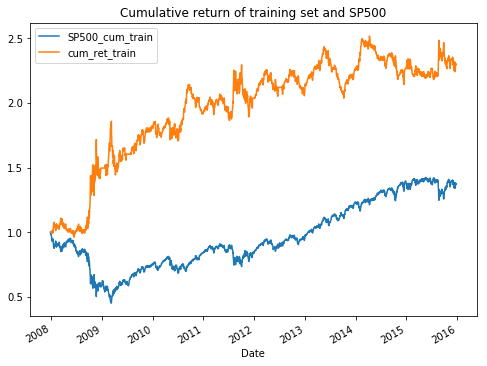

In [23]:
fig1 = cum_ret_df.plot(figsize = (8,6), title = "Cumulative return of training set and SP500")
plt.savefig("fig1.png")

## 3. Testing data 

First, we calculate the Hurst exponent in advanced for the testing data. 

In [24]:
# myseries = SP500.Adj_Close.values[126:252]
# print(genhurst(myseries, q = 1, maxT = 30))
# print(len(myseries))

Hurst_exponent_test = np.zeros(5)

for i in range(5): # in total, we will switch strategy 5 times for training set, 
                    # so we need to calculate Hurst exponent 5 times
    myseries = SP500_test.Adj_Close.values[(i*126):(i*126 + 126)].copy()
    Hurst_exponent_test[i] = genhurst(myseries, 1, 30)
    
print(Hurst_exponent_test)

[0.4393714  0.53608049 0.42742816 0.48052036 0.47864561]


So, we apply the best set of parameters obtained above for the testing data.

In [25]:
signal_size = 45
EMA_size = 10
vol_size = 10
m = 0.7

if 'return_total_test' in locals() or 'return_total_test' in globals():
    del return_total_test

for i in range(1, 6): # we have 2142 observations, so we will switch strategy 16 times (2142/126 - 1 = 16)
                      # and we start trading at June of 2016, so i should start from 1, not 0

    myPrice = SP500_test.Adj_Close.values[(i*126):(i*126 + 126)].copy()

    # Here, we smooth the time series of price by fast EMA (from 10 to 45) and use it as a signal
    # in the volatility breakout model instead of the price series itself
    mySignal = np.asarray(EMA(SP500_test.Adj_Close.values[(i*126 - signal_size+1):(i*126 + 126)].copy(), 
                              signal_size))
    mySignal = mySignal[~np.isnan(mySignal)]

    # Now, we calculate the Upper and Lower thresholds for the breakout model
    myEMA = np.asarray(EMA(SP500_test.Adj_Close.values[(i*126 - EMA_size+1):(i*126 + 126)].copy(), EMA_size))
    myEMA = myEMA[~np.isnan(myEMA)]

    myVol = np.asarray(roll_sd(SP500_test.Adj_Close.values[(i*126 - vol_size+1):(i*126 + 126)].copy(), 
                               vol_size))
    myVol = myVol[~np.isnan(myVol)]

    myLower = myEMA - m * myVol
    myUpper = myEMA + m * myVol

    # Based on Hurst exponent, we determine the strategy for the period (momentum or mean-reverting)
    hurst = Hurst_exponent_test[i-1]

    if hurst < 0.5:
        pos = np.asarray(breakout_vol (signal = mySignal, 
                                       lower = myLower,
                                       upper = myUpper,
                                       strategy = "mr")) # if hurst < 0.5, we apply mean-reverting strategy
    elif hurst > 0.5:
        pos = np.asarray(breakout_vol (signal = mySignal, 
                                       lower = myLower,
                                       upper = myUpper,
                                       strategy = "mom")) # if hurst > 0.5, we apply momentum strategy
    else:
        pos = np.ones(len(myPrice)) # else we just apply buy & hold for that period

    # We calculate number of transactions by taking 1st difference of position
    ntrans = np.asarray([abs(pos[i] - pos[i-1]) for i in range(1, len(pos))])
    # To have the same length as pos array, we add 1 more element at the beginning of ntrans array
    # the position at the beginning is just 0
    ntrans = np.insert(ntrans, 0, 0)

    # The transaction cost is assumed to be 0.01%, we trade on 100 units, so we calculate the daily
    # gain/loss as Difference_in_price * position * 100 - no_of_trans * 0.0001 * price * 100
    myDiff = SP500_test.Diff.values[(i*126):(i*126 + 126)].copy()
    PnL = myDiff * 100 * pos  - ntrans * 0.0001 * myPrice * 100 

    # Then we calculate the net return:
    trading_return = PnL/(myPrice * 100)

    if 'return_total_test' not in locals() and 'return_total_test' not in globals():
        return_total_test = trading_return.copy()
    else:
        return_total_test = hstack((return_total_test, trading_return))
        
    if 'trade_total_test' not in locals() and 'trade_total_test' not in globals():
        trade_total_test = sum(ntrans)
    else:
        trade_total_test = trade_total_test + sum(ntrans)

    del myPrice, mySignal, myEMA, myVol, myLower, myUpper, hurst, pos, ntrans, myDiff, PnL, trading_return

print("AR:", Mean(return_total_test)*252) # Annualized Returns
print("AS:", Std(return_total_test) * (252**0.5)) # Annualized Std
print("SR:", SR(return_total_test)) # Annualized Sharpe Ratio
print("No. of trades:", trade_total_test)
print(len(return_total_test))
print(return_total_test[0:10])

# We also create an array of cumulative return
cum_ret_test = np.asarray(cum_ret(return_total_test))
print(cum_ret_test[0:10])

AR: 0.019030507644876005
AS: 0.12206877033724607
SR: 0.1352557873669205
No. of trades: 15
630
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.47495664e-05]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.00003475]


In [26]:
# BENCHMARK

SP500_return_test = SP500_test.Simple_Return.values[126:].copy()
# in the strategy above, we start trading in June of 2016, 
# so we also exclude the first 126 observations (first 6 months of 2016)
# so the benchmark and our trading strategy have the same trading period

# We assume that the first return is 0 as there is no 'previous' price to calculate return on the first day
# so it has the same starting point as our strategy
SP500_return_test[0] = 0

print(Mean(SP500_return_test)*252) # Annualized Returns
print(Std(SP500_return_test) * (252**0.5)) # Annualized Std
print(SR(SP500_return_test))
print(len(SP500_return_test))
print(SP500_return_test[0:10])

# We also create an array of cumulative return
SP500_cum_test = np.asarray(cum_ret(SP500_return_test))
print(SP500_cum_test[0:10])

0.08063966637011785
0.12294640933061565
0.6353960786284206
630
[ 0.          0.01356504  0.0019486  -0.00684748  0.00535296 -0.00087158
  0.01525335  0.00340862  0.00700929  0.00013477]
[1.         1.01356504 1.01554008 1.00858619 1.01398512 1.01310135
 1.02855454 1.03206049 1.0392945  1.03943456]


In [27]:
print("MD_test:", MaxDD(return_total_test))
print("MD_SP500:", MaxDD(SP500_return_test))
print("IR:", IR(return_total_test, SP500_return_test))

MD_test: -3.9470340181593335
MD_SP500: -2.8439554459440135
IR: -0.3602712070156466


In [28]:
cum_ret_df2 = SP500_test.iloc[126:, 0:1].copy()
cum_ret_df2['SP500_cum_test'] = SP500_cum_test
cum_ret_df2['cum_ret_test'] = cum_ret_test
cum_ret_df2['Date'] = pd.to_datetime(cum_ret_df2['Date'])
cum_ret_df2 = cum_ret_df2.set_index('Date')
print(cum_ret_df2.head(10))
print(cum_ret_df2.count())

            SP500_cum_test  cum_ret_test
Date                                    
2016-06-29        1.000000      1.000000
2016-06-30        1.013565      1.000000
2016-07-01        1.015540      1.000000
2016-07-05        1.008586      1.000000
2016-07-06        1.013985      1.000000
2016-07-07        1.013101      1.000000
2016-07-08        1.028555      1.000000
2016-07-11        1.032060      1.000000
2016-07-12        1.039295      1.000000
2016-07-13        1.039435      1.000035
SP500_cum_test    630
cum_ret_test      630
dtype: int64


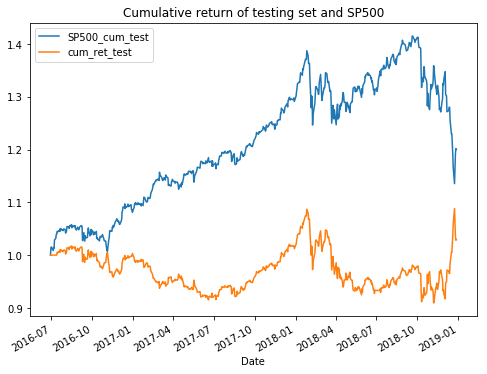

In [29]:
cum_ret_df2.plot(figsize = (8,6), title = "Cumulative return of testing set and SP500")
plt.savefig("fig2.png")